# After the experiments are conducted and the results saved I want to analyse them here in a different notebook

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import time

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

from mylib.my_xgb import BinaryDecisionTree as BDT
from mylib.my_xgb import add_class

import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'db_pipelines'

In [7]:
# open file

data_folder = Path("../../../data/ForestCoverDataset/")
file_to_open = data_folder / "covtype.data"

In [8]:
# read and prepare data

data = pd.read_csv(file_to_open, delimiter=",", header=None)

# add the header manually
header = {0: "Elevation", 1: "Aspect", 2: "Slope", 3: "Horizontal_Distance_To_Hydrology",
          4: "Vertical_Distance_To_Hydrology", 5: "Horizontal_Distance_To_Roadways",
          6: "Hillshade_9am", 7: "Hillshade_Noon", 8: "Hillshade_3pm", 9: "Horizontal_Distance_To_Fire_Points"}

# try without all the onehot-encoded features

# add the names of binary columns
for i in range(1, 5):
    header[9+i] = f"Wilderness_Area_{i}"

for i in range(1, 41):
    header[13+i] = f"Soil_Type_{i}"

header[54] = "Class"

#data = data.drop(range(10,54), axis=1)

data = data.rename(header, axis=1)

# need feature matrix X and labels labels for xgboost
#labels = data["Class"]
data["Class"] = data["Class"] - 1   # want 0-based index
#X = data.drop(["Class"],axis=1,inplace=False)
data.to_csv(data_folder / 'ForestCoverDataset.csv')

In [12]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,2
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,2
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,2
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,2


In [5]:
class_distributions.label_proportions(labels)

6    0.260525
5    0.193667
0    0.148924
4    0.141650
3    0.119756
1    0.097127
2    0.038351
Name: Class, dtype: float64

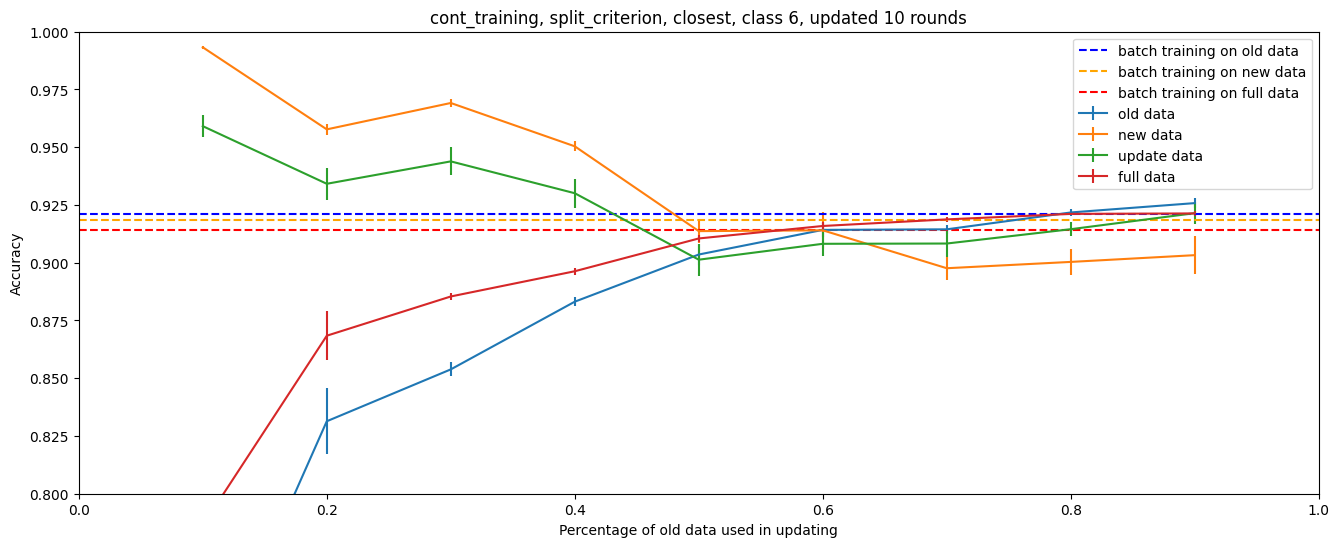

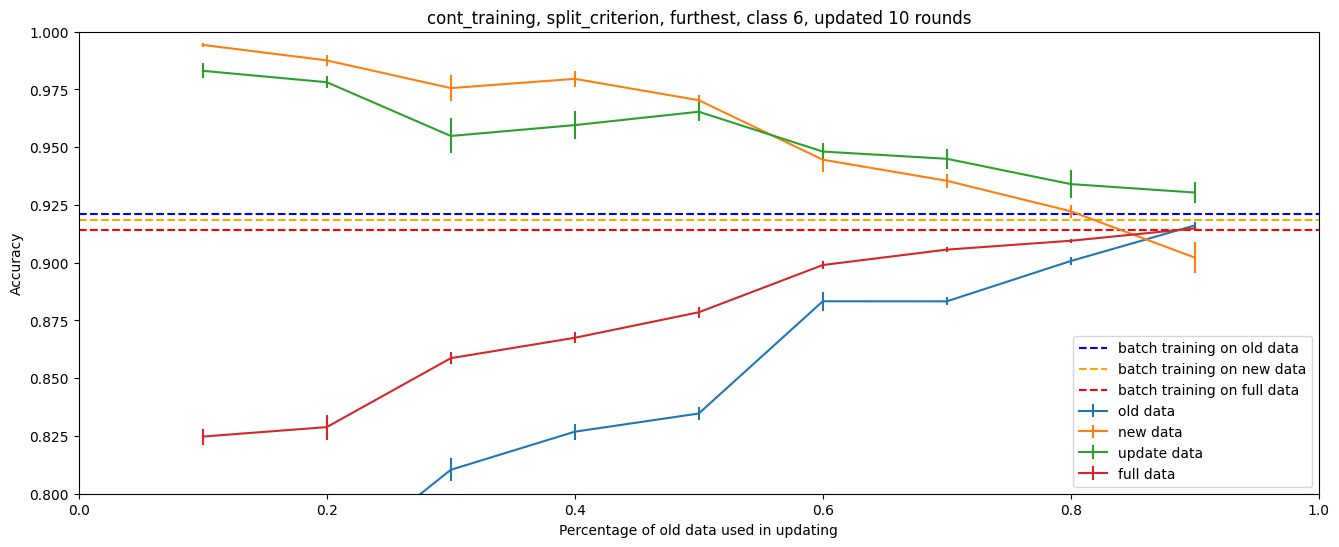

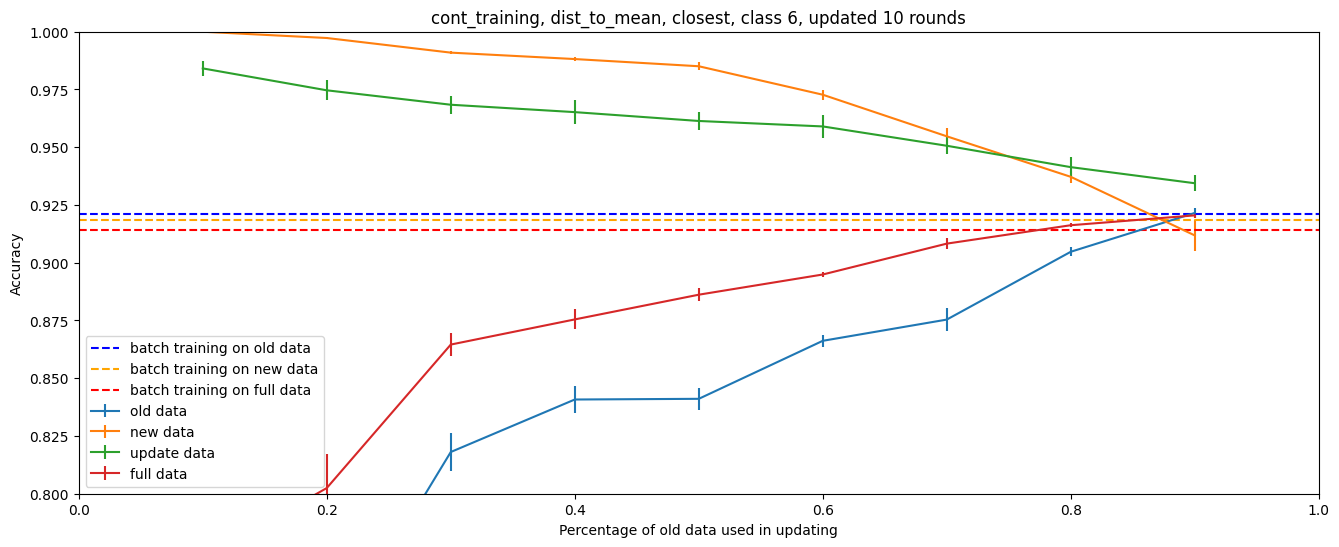

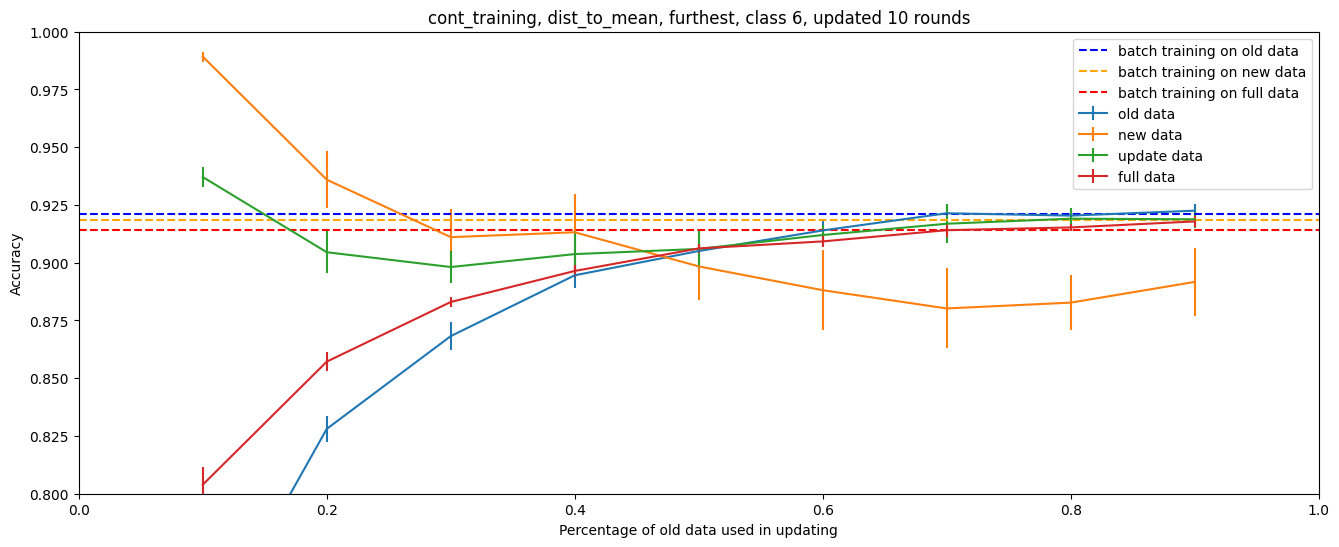

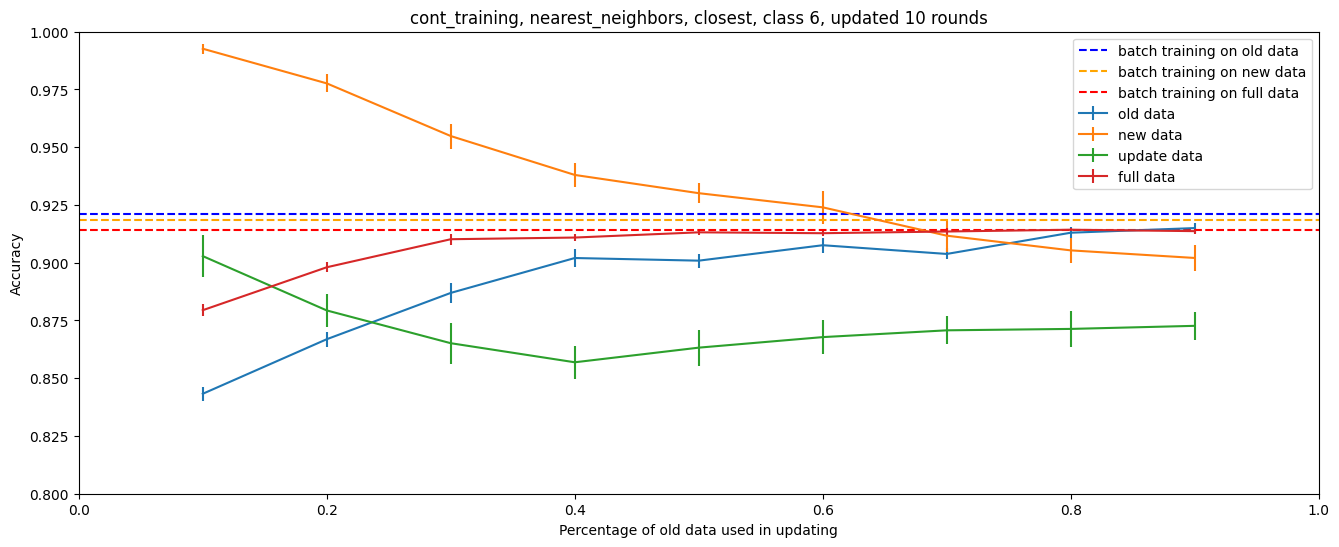

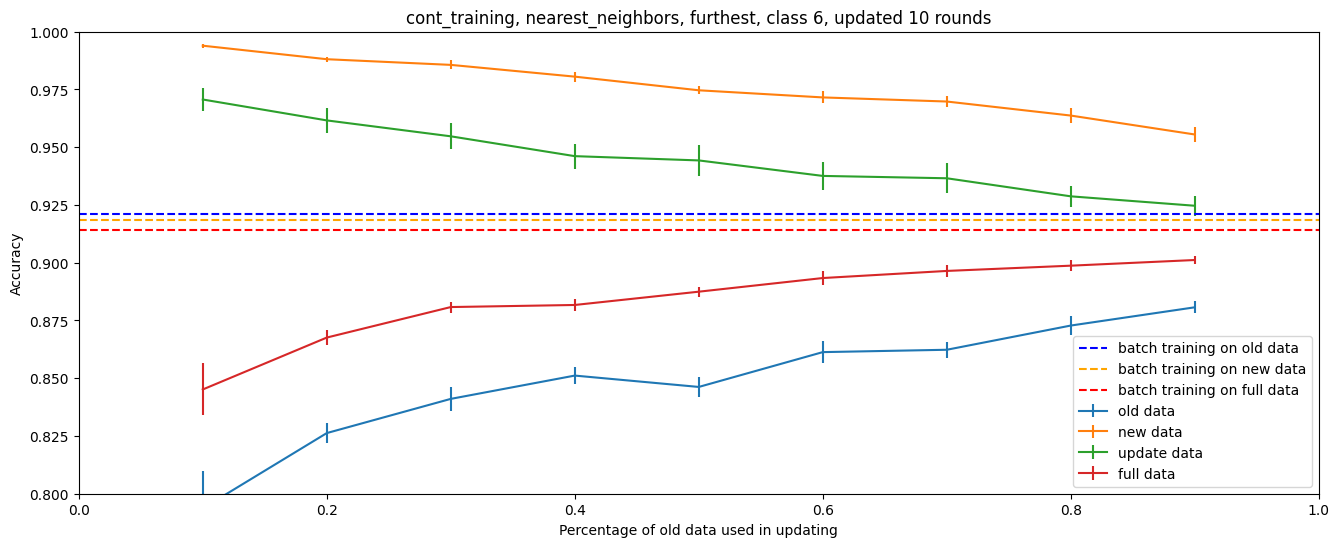

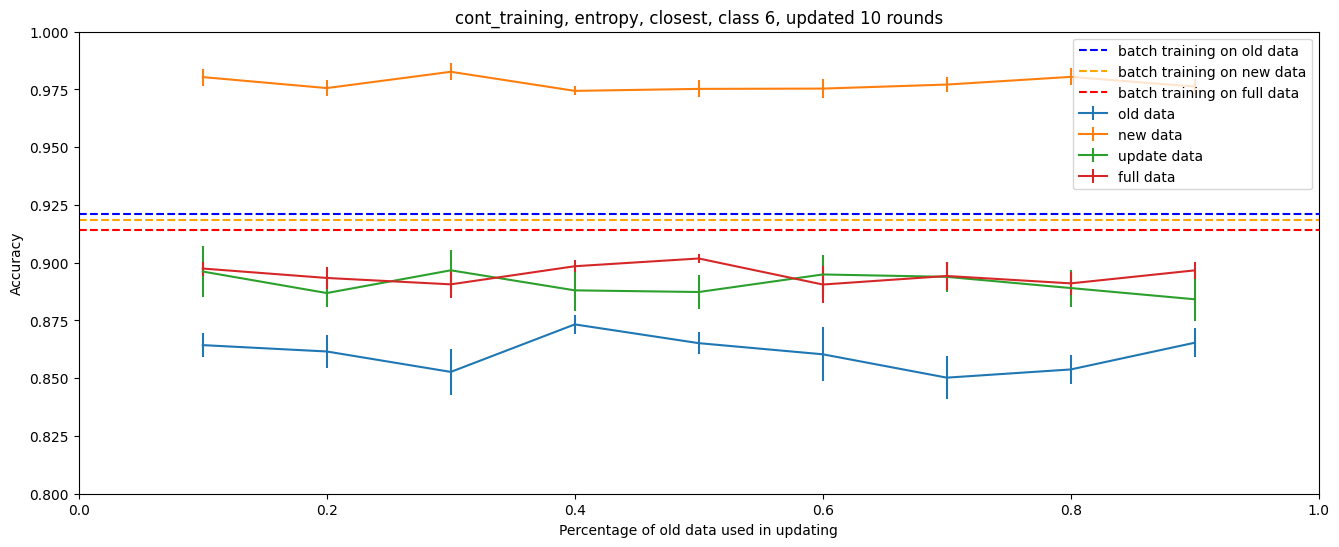

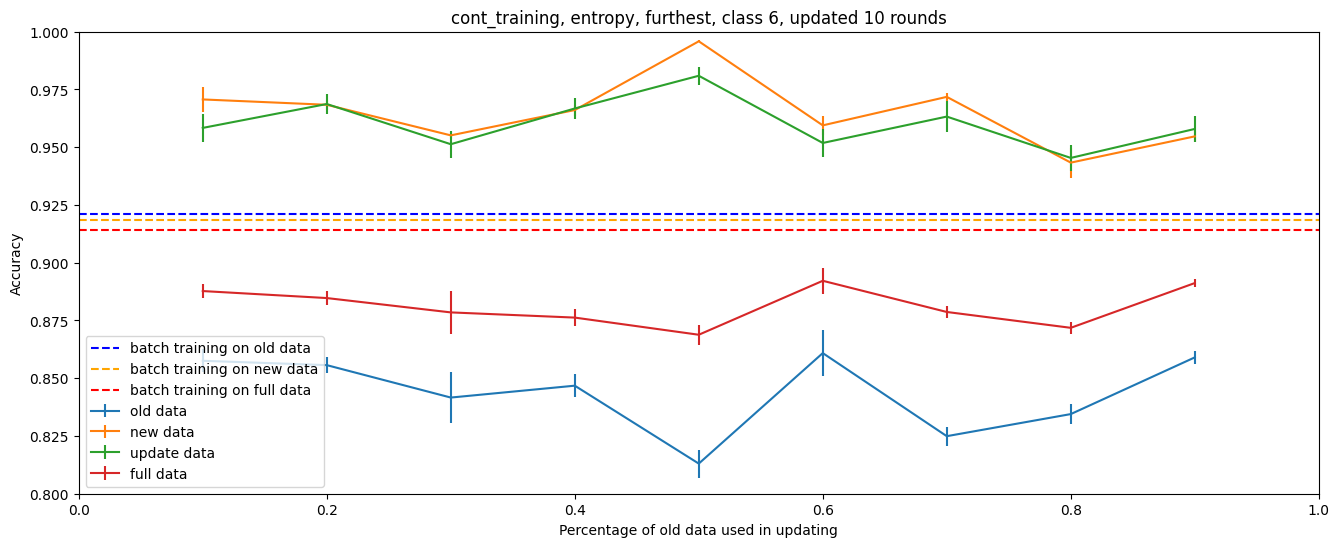

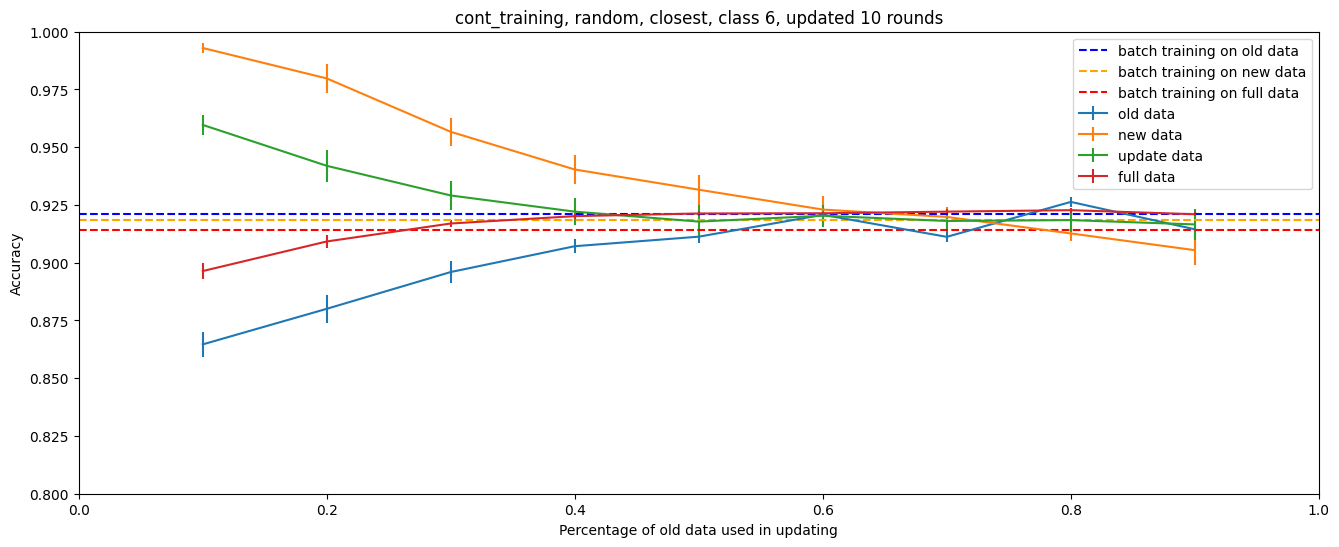

In [40]:
new_class_idx = 6

batch_results = helper_funcs.unpack_batch_results(new_class_idx)

for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
    for sort_type in ['closest', 'furthest']:
        experiment_results = helper_funcs.unpack_results(data_selection_method, sort_type, new_class_idx)
        helper_funcs.plot_results(experiment_results, batch_results, data_selection_method, sort_type, new_class_idx, save=True)

# and once for random method
experiment_results = helper_funcs.unpack_results('random', 'closest', new_class_idx)
helper_funcs.plot_results(experiment_results, batch_results, 'random', 'closest', new_class_idx, save=True)